In [1]:
import requests
import pandas as pd
from datetime import datetime

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\envs\dev\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [32]:
api_key = '189ee744182cf220b063c058e48b37d60b071f5a8e14a017b8553dfe5da5e476'
limit = 2000
# day or hour
freq_type = 'day'
url = 'https://min-api.cryptocompare.com/data/v2/histo' + freq_type + '?fsym=BTC&tsym=USD&limit=' + str(limit) +'&api_key=' + api_key + '&all_data=true'


In [19]:
print(url)

https://min-api.cryptocompare.com/data/v2/histohour?fsym=BTC&tsym=USD&limit=2000&api_key=189ee744182cf220b063c058e48b37d60b071f5a8e14a017b8553dfe5da5e476&all_data=true


In [90]:
class DataFetcher:
    
    def __init__(self, api_key, limit=2000, freq_type='day', fsym='BTC', tsym='USD'):
        self.api_key = api_key
        self.limit = limit
        self.freq_type = freq_type
        self.fsym = fsym
        self.tsym = tsym
        
    @property
    def url(self):
        return f'https://min-api.cryptocompare.com/data/v2/histo{self.freq_type}?fsym={self.fsym}&tsym={self.tsym}&limit={self.limit}&api_key={api_key}&all_data=true'
    
    @staticmethod
    def get_df_from_url(url):
        resp = requests.get(url)
        data = resp.json()['Data']['Data']
        return pd.DataFrame(data)
    
    @staticmethod
    def timestamp_to_date(df):
        df['date'] = df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M'))
        return df.set_index('date')
    
    def get_url_timestamp(self, min_timestamp):
        return f'{self.url}&toTs={min_timestamp}'
    
    def fetch(self, max_iter):
        df = get_df_from_url(self.url)
        for i in range(max_iter):
            min_timestamp = df['time'].min()
            url_timestamp = self.get_url_timestamp(min_timestamp)
            new_part = self.get_df_from_url(url_timestamp)
            df = df.append(new_part)
        df.drop_duplicates(inplace=True)
        df = self.timestamp_to_date(df)
        df.sort_index(inplace=True)
        return df

In [93]:
fetcher = DataFetcher(api_key)
df = fetcher.fetch(1)

In [169]:
df.to_csv('btc_full_hour_2020_02_01.csv')

In [198]:

def plot_last_values(y1, y2, n_val=1000):
    x1 = list(range(n_val))
    x2 = list(range(n_val, n_val + len(y2)))
    pylab.plot(x1, y1[-n_val:])
    pylab.plot(x2, y2[-n_pred:])

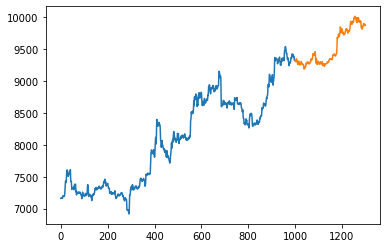

In [215]:
val = df['avg'].values[60000:]
n_pred = 300
y1 = val
y2 = fourierExtrapolation(val, n_predict=n_pred, n_harm=100000)
y2_hat = abs(y2[-n_pred] - y1[-1]) + y2[-n_pred:]
plot_last_values(y1, y2_hat, n_val=1000)

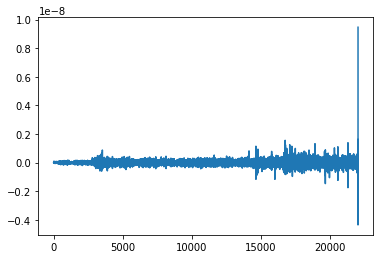

In [216]:
pylab.plot(y2[:-n_pred] - y1)

In [197]:
y2[:-n_pred].shape, y1.shape
abs(y2[-n_pred] - y1[-1]) + y2[:-n_pred]
len(y2)

300